### Set up environment

In [1]:
import lateral_signaling as lsig
import numpy as np
import pandas as pd
from tqdm import tqdm
import numba

import scipy.stats as st
from scipy.spatial import Voronoi
from scipy.sparse import csr_matrix

import colorcet as cc

import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib_scalebar.scalebar import ScaleBar

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W

In [2]:
import os

In [3]:
%load_ext blackcellmagic
%matplotlib inline

__Define RHS function(s)__

In [4]:
def tc_rhs_beta_normA(S, S_delay, Adj, sender_idx, beta_func, beta_args, alpha, k, p, delta, lambda_, g, rho):
    """
    Right-hand side of the transciever circuit delay 
    differential equation. Uses a matrix of normalized 
    cell-cell contact lengths `Adj`.
    """

    # Get signaling as a function of density
    beta = beta_func(rho, *beta_args)
    
    # Get input signal across each interface
    S_bar = beta * (Adj @ S_delay)

    # Calculate dE/dt
    dS_dt = (
        lambda_
        + alpha
        * (S_bar ** p)
        / (
            k ** p 
            + (delta * S_delay) ** p 
            + S_bar ** p
        )
        - S
    )

    # Set sender cell to zero
    dS_dt[sender_idx] = 0

    return dS_dt

<hr>

## Set variables for reading/writing data

In [5]:
# Set parameters to save figures
save_figs = False
save_dir = "C:\\Users\\Pranav\\git\\evomorph\\lateral_signaling\\plots"
dpi = 180
fig_fmt = "png"
vid_fmt = "mp4"

# Set directory for saving figures
dir_name = "plots"

In [6]:
# Set parameters to save data
save_data = False
data_dir = "C:\\Users\\Pranav\\git\\evomorph\\data"

### Specify parameter set to use

In [7]:
# Set  name of trial
trial_name = "lowcis_expbeta"

# Set seed for RNG
seed = 2021

__Set growth min and max__

In [8]:
# Set max density
rho_max = 5.63040245

__Set RHS of dynamical equation__

In [9]:
# Set the RHS function in long-form (accepts all parameters)
rhs_long = tc_rhs_beta_normA

In [10]:
# Set function that sets dampening factor 
beta_func = lsig.beta_rho_exp

__Set max interaction radius__

In [11]:
# Interaction radius in cell-diameters
irad = 3.05

<hr>

## Fetch parameters

In [12]:
# Read trial parameters from CSV
params_df = pd.read_csv("parameters_" + trial_name + ".csv")
params_df

trial_name     parameter    value
0  lowcis_expbeta         alpha  3.00000
1  lowcis_expbeta             k  0.02000
2  lowcis_expbeta             p  2.00000
3  lowcis_expbeta         delta  1.00000
4  lowcis_expbeta       lambda_  0.00001
5  lowcis_expbeta             g  1.00000
6  lowcis_expbeta  beta_param_0  1.00000
7  lowcis_expbeta         delay  0.30000

In [13]:
# Get any arguments for beta function
is_beta_arg = [p.startswith("beta_") for p in params_df["parameter"].values]
beta_args   = params_df.value.values[is_beta_arg]

# Get the delay parameter
is_delay    = [p == "delay" for p in params_df["parameter"].values]
delay       = params_df.value.values[is_delay][0]

# Package all other parameters 
is_param    = [not (ba or d) for ba, d in zip(is_beta_arg, is_delay)]
param_names = params_df.parameter.values[is_param]
param_vals  = params_df.value.values[is_param]

# Package arguments for lsig.integrate_DDE and 
#   lsig.integrate_DDE_varargs. Density param is 
#   initialized with the reference value of `1`.
dde_args = *param_vals, 1.

In [14]:
# Get `k`
where_k = next(i for i, pn in enumerate(param_names) if "k" == pn)
k = param_vals[where_k]
thresh = k

# Get `g`
where_g = next(i for i, pn in enumerate(param_names) if "g" == pn)
g = param_vals[where_g]

<hr>

__Set time parameters__

In [15]:
# Set time parameters in dimensionless units
tmax_days = 8
nt_t = 500
nt = int(nt_t * tmax_days) + 1

tmax = tmax_days / lsig.t_to_units(1)
t = np.linspace(0, tmax, nt)

__Construct lattice of cells__

In [16]:
# Make square lattice
rows = cols = 35
X = lsig.hex_grid(rows, cols)

# Get # cells
n = X.shape[0]

__Get cell adjacency__

In [17]:
# Get adjacency and normalize
# iAdj = lsig.irad_Adj(X, irad, sparse = True, row_stoch=True)
gAdj = lsig.gaussian_irad_Adj(X, irad, sparse=True, row_stoch=True)

__Set sender cell location__

In [18]:
# Set sender cell
sender_idx = lsig.get_center_cells(X)

__Set initial expression__

In [19]:
# Get basal promoter activity
lambda_ = dde_args[4]

# Seed random initial expression
## Values are drawn from a HalfNormal distribution with mean `lambda_`
S0 = st.halfnorm.rvs(
    size=n, 
    scale=lambda_ * np.sqrt(np.pi/2), 
    random_state=seed,
).astype(np.float32)

# Fix sender cell(s) to expression of 1
S0[sender_idx] = 1

__Get RHS of signaling DDE__

In [20]:
# Get RHS of DDE equation to pass to integrator
rhs = lsig.get_DDE_rhs(rhs_long, gAdj, sender_idx, beta_func, beta_args,)

__Set length-scale of simulation__

In [21]:
scale_factor = np.sqrt(
    8 / (3 * np.sqrt(3)) 
    / (1250)  # cells per mm^2
    * (1e6)  # mm^2  per μm^2
)

# Optional: specify values to use in scalebar
# scalebar_vals = [125, 100, 75]F

print(f"Cell diameter at reference density: {int(scale_factor)} μm")

Cell diameter at reference density: 35 μm


# Propagation for different values of $\beta$

In [22]:
# Set initial density
rho_0 = 1.

# Calculate logistic growth
rho_t = lsig.logistic(t, g, rho_0, rho_max)

In [23]:
# Set args
dde_args = (*dde_args[:6], rho_0)

tf_nondim = lambda i: f"simulation time: {t[i]:.1f} "
tf_days = lambda i: f"{lsig.t_to_units(t[i]):.1f} days"

In [24]:
S_t = lsig.integrate_DDE_varargs(
    t,
    rhs,
    var_vals=[rho_t],
    where_vars=6,
    dde_args=dde_args,
    E0=S0,
    delay=delay,
    progress_bar=True,
    varargs_type="list",
)

100%|██████████| 4000/4000 [00:00<00:00, 6248.05it/s]


<hr>

In [25]:
import holoviews as hv
hv.extension("matplotlib")

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W

## Plot time-series of GFP expression

In [26]:
# Calculate the number of activated transceivers
S_n_act_t = (S_t > k).sum(axis=1) - sender_idx.size

In [27]:
# Percent of activated transceivers
S_pct_act_t = S_n_act_t / (n - sender_idx.size) * 100

# Optionally normalize percentage
S_pct_act_t = lsig.normalize(S_pct_act_t, 0, S_pct_act_t.max()) * 100

# Area of activation
S_A_t = lsig.ncells_to_area(S_n_act_t, rho_t)

# Normalize area of activation
S_A_t_norm = lsig.normalize(S_A_t, 0, S_A_t.max())

In [28]:
# Sub-sample time-points
sample_skip = 75
t_sample = t[::sample_skip].copy()
S_A_t_sample = S_A_t[::sample_skip]

In [29]:
# Make data
data = {
    "t"   : lsig.t_to_units(t_sample),
    "S_A_t" : S_A_t_sample,
}

# Plot
plot = hv.Curve(
    data,
    kdims=["t"],
    vdims=["S_A_t"],
).opts(
    xlabel="days",
    ylabel=r"area activated",
    xlim=(-0.15, lsig.t_to_units(tmax) + 0.15),
    xticks=[0, 2, 4, 6, 8],
#     ylim=(-0.05, 1.05),
#     yticks=[0.0, 0.5, 1.0],
    linewidth=4,
    fontscale=1.5,
    c="k",
)

:Curve   [t]   (S_A_t)
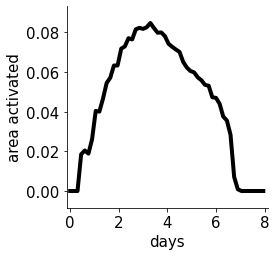

In [30]:
plot

In [31]:
# Save figure
if save_figs:
    plot_fname = f"propagation_increasing_density_area_1-4X_{cols}days"
    plot_path = os.path.join(save_dir, plot_fname + "." + fig_fmt)
    hv.save(plot, plot_path, dpi=dpi, fmt=fig_fmt)

<hr>

## Simulate intracellular reporter accumulation

In [32]:
def reporter_rhs(R, R_delay, S, gamma_R):
    dR_dt = (S - R) * gamma_R
    
    dR_dt[sender_idx] = 0
    
    return dR_dt

In [33]:
# Set parameter(s)
gamma_R = 0.1

R_args = [S_t[0], gamma_R]


R0 = np.zeros(n, dtype=np.float32)

In [34]:
R_t = lsig.integrate_DDE_varargs(
    t,
    reporter_rhs,
    var_vals=[S_t],
    where_vars=0,
    dde_args=R_args,
    E0=R0,
    delay=0,
    progress_bar=True,
    min_delay=0,
    varargs_type="list",
)

100%|██████████| 4000/4000 [00:00<00:00, 32343.49it/s]


:Overlay
   .Points.I  :Points   [x,y]
   .Points.II :Points   [x,y]
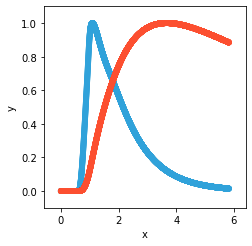

In [35]:
# Plot an example of the reporter response
s_ = S_t[:, sender_idx + 5].ravel()
s_norm = s_ / s_.max()
r_ = R_t[:, sender_idx + 5].ravel()
r_norm = r_ / r_.max()

hv.Points((t, s_norm)) * hv.Points((t, r_norm))

:Overlay
   .HLine.I   :HLine   [x,y]
   .Points.I  :Points   [x,y]
   .Points.II :Points   [x,y]
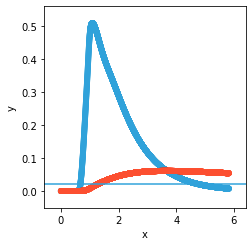

In [36]:
hv.HLine(k) * hv.Points((t, s_)) * hv.Points((t, r_))

<hr>

## Save simulation data

In [37]:
results = dict(
    trial_name=trial_name,
    seed=seed,
    rho_max=rho_max,
    beta_func=beta_func,
    irad=irad,
    beta_args=beta_args,
    delay=delay,
    param_names=param_names,
    param_vals=param_vals,
    dde_args=dde_args,
    k=k,
    g=g,
    tmax_days=tmax_days,
    tmax=tmax,
    nt_t=nt_t,
    nt=nt,
    t=t,
    X=X,
    n=n,
    sender_idx=sender_idx,
    S0=S0,
    scale_factor=scale_factor,
    rho_0=rho_0,
    rho_t=rho_t,
    S_t=S_t,
    S_n_act_t=S_n_act_t,
    S_pct_act_t=S_pct_act_t,
    S_A_t=S_A_t,
    S_A_t_norm=S_A_t_norm,
    gamma_R=gamma_R,
    R_t=R_t,
)

In [38]:
if save_data:
    
    data_fname = f"GFP_reporter_increasing_density_7days_simdata"
    data_path = os.path.join(data_dir, data_fname + ".npz")
    
    np.savez_compressed(data_path, **results)

<hr>

## Plot GFP fluorescence

In [39]:
X_rho_t = np.array([X / np.sqrt(rho) for rho in rho_t])

In [40]:
# Get field of view boundaries
xlim, ylim = np.array([X.min(axis=0), X.max(axis=0)]).T / np.sqrt(rho_t.max())

# Center on sender cell
xlim[1] = X[sender_idx, 0] + (X[sender_idx, 0] - xlim[0])
ylim[1] = X[sender_idx, 1] + (X[sender_idx, 1] - ylim[0])

# Format as tuples (immutable)
xlim, ylim = tuple(xlim), tuple(ylim)

# Set limits on fluorescence colorscale
vmin,  vmax  = 0, 0.3

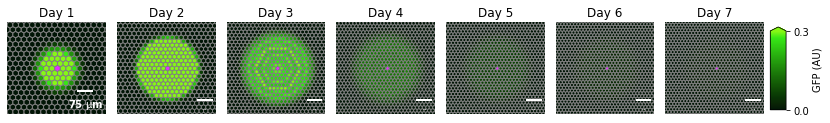

In [42]:
# Plot single frames
cols = 7
fig, axs = plt.subplots(
    1, 
    cols, 
    figsize=(5/3*7, 5/3),
    gridspec_kw=dict(width_ratios=[1, 1, 1, 1, 1, 1, 1.25]),
)

cbar_kwargs = dict(ticks=[0.0, 0.3], label="GFP (AU)")

for i in range(cols):
    
    ax = axs[i]
    
    # Sample Days 1 to 7
    frame = nt_t * (1 + i)
    
    # Set title
    title = f"Day {lsig.t_to_units(t[frame]):.0f}"
    
    lsig.inspect_hex(
        ax=ax,
        X=X_rho_t[frame],
        idx=frame,
        var_t=S_t,
        vmin=vmin,
        vmax=vmax,
        cmap=lsig.kgy,
        sender_idx=sender_idx,
        sender_clr=("bmw", 150),
        title=title,
        colorbar=False,
        xlim=xlim,
        ylim=ylim,
    )
    
    if i == (cols - 1):
        
        # Plot colorbars in last column
        cbar = plt.colorbar(
            plt.cm.ScalarMappable(
                norm=mpl.colors.Normalize(vmin, vmax), 
                cmap=lsig.kgy,
            ), 
            ax=ax,
            aspect=5,
            extend="max",
            shrink=0.9,
            **cbar_kwargs
        )
    
    # Hide scalebar text except in first image
    font_size = (i == 0) * 10    
    
    # Make scalebar
    scalebar = ScaleBar(
        scale_factor,   # cell diameter in meters
        units="um", 
        color="w", 
        box_color="w", 
        box_alpha=0, 
        font_properties=dict(weight=1000, size=font_size), 
        width_fraction=0.03,
        location="lower right"
    )

    ax.add_artist(scalebar);
    
plt.tight_layout()

if save_figs:
    fig_fname = f"propagation_increasing_density_rho0_1X_{cols}days"
    fig_path = os.path.join(save_dir, fig_fname + "." + fig_fmt)
    fig.savefig(fig_path, dpi=dpi, format=fig_fmt,)

<hr>

## Plot reporter expression

In [43]:
vmin_r, vmax_r = 0, 0.1

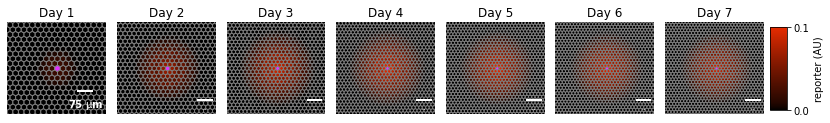

In [42]:
# Plot single frames
cols = 7
fig, axs = plt.subplots(
    1, 
    cols, 
    figsize=(5/3*7, 5/3),
    gridspec_kw=dict(width_ratios=[1, 1, 1, 1, 1, 1, 1.25]),
)

cbar_kwargs = dict(ticks=[vmin_r, vmax_r], label="reporter (AU)")

for i in range(cols):
    
    ax = axs[i]
    
    # Sample Days 1, 2, 3
    frame = nt_t * (1 + i)
    
    # Set title
    title = f"Day {lsig.t_to_units(t[frame]):.0f}"
    
    lsig.inspect_hex(
        ax=ax,
        X=X_rho_t[frame],
        idx=frame,
        var_t=R_t,
        vmin=vmin_r,
        vmax=vmax_r,
        cmap="kr",
        sender_idx=sender_idx,
        sender_clr=("bmw", 150),
        title=title,
        colorbar=False,
        xlim=xlim,
        ylim=ylim,
    )
    
    if i == (cols - 1):
        
        # Plot colorbars in last column
        cbar = plt.colorbar(
            plt.cm.ScalarMappable(
                norm=mpl.colors.Normalize(vmin_r, vmax_r), 
                cmap=cc.cm["kr"]), 
            ax=ax,
            aspect=5,
            extend="neither",
            shrink=0.9,
            **cbar_kwargs
        )
    
    # Hide scalebar text except in first image
    font_size = (i == 0) * 10    
    
    # Make scalebar
    scalebar = ScaleBar(
        scale_factor,   # cell diameter in meters
        units="um", 
        color="w", 
        box_color="w", 
        box_alpha=0, 
        font_properties=dict(weight=1000, size=font_size), 
        width_fraction=0.03,
        location="lower right"
    )

    ax.add_artist(scalebar);
    
plt.tight_layout()

if save_figs:
    fig_fname = f"reporter_increasing_density_rho0_1X_{cols}days"
    fig_path = os.path.join(save_dir, fig_fname + "." + fig_fmt)
    fig.savefig(fig_path, dpi=dpi, format=fig_fmt,)

<hr>

## Create layout of time-series

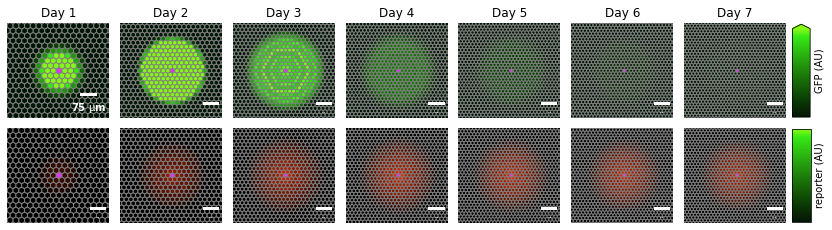

In [46]:
# Plot single frames
rows, cols = 2, 7
fig, axs = plt.subplots(
    rows, 
    cols, 
    figsize=(5/3*7, 5*2/3), 
    gridspec_kw=dict(width_ratios=[1, 1, 1, 1, 1, 1, 1.25]),
)

cbar_aspect = 5

for i in range(rows * cols):
    
    row = i % rows
    col = i // rows
    ax = axs[row][col]
    
    # Sample Days 1, 2, 3
    frame = nt_t * (1 + col)
    
    
    if (row == 0):
        
        # Params for GFP colorbar
        cmap_ = lsig.kgy
        cbar_kwargs = dict(ticks=[], label="GFP (AU)")
        extend_ = "max"
            
        # Params for GFP expression
        title = f"Day {lsig.t_to_units(t[frame]):.0f}"
        var_t_ = S_t
        vmin_, vmax_ = vmin, vmax
        
    elif (row == 1):
        
        # Params for reporter colorbar
        cmap_ = "kr"
        cbar_kwargs = dict(ticks=[], label="reporter (AU)")
        extend_ = "neither"

        # Params for reporter expression
        title = ""
        var_t_ = R_t
        vmin_, vmax_ = vmin_r, vmax_r

    if col == (cols - 1):
        
        # Plot colorbars in last column
        cbar = plt.colorbar(
            plt.cm.ScalarMappable(
                norm=mpl.colors.Normalize(vmin_, vmax_), 
                cmap=lsig.kgy,
            ), 
            ax=ax,
            aspect=cbar_aspect,
            extend=extend_,
            shrink=0.9,
            **cbar_kwargs
        )

    # Plot expression
    lsig.inspect_hex(
        ax=ax,
        X=X_rho_t[frame],
        idx=frame,
        var_t=var_t_,
        vmin=vmin_,
        vmax=vmax_,
        cmap=cmap_,
        sender_idx=sender_idx,
        sender_clr=("bmw", 150),
        title=title,
        colorbar=False,
        xlim=xlim,
        ylim=ylim,
    )

    # Hide scalebar text except in first image
    font_size = (i == 0) * 10    

    # Make scalebar
    scalebar = ScaleBar(
        scale_factor,   # cell diameter in meters
        units="um", 
        color="w", 
        box_color="w", 
        box_alpha=0, 
        font_properties=dict(weight=1000, size=font_size), 
        width_fraction=0.03,
        location="lower right"
    )

    ax.add_artist(scalebar);

    
plt.tight_layout()

if not save_figs:
    fig_fname = f"GFP_reporter_increasing_density_rho0_1X_{cols}days"
    fig_path = os.path.join(save_dir, fig_fname + "." + fig_fmt)
    fig.savefig(fig_path, dpi=dpi, format=fig_fmt,)

<hr>

### Save videos

In [44]:
vid_fnames = [
    f"propagation_increasing_density_rho0_1X_{cols}days",
    f"reporter_increasing_density_rho0_1X_{cols}days",
]
vid_path = [
    os.path.join(save_dir, f + "." + vid_fmt) 
    for f in vid_fnames
]

title_fun = lambda i: f"{lsig.t_to_units(t)[i]:.2f} days"

sbar_kwargs = dict(
    units="um", 
    color="w", 
    box_color="w", 
    box_alpha=0, 
    font_properties=dict(weight=1000, size=10), 
    width_fraction=0.03,
    location="lower right"
)


In [45]:
if save_figs:

    lsig.animate_var_lattice_scalebar(
        X_rho_t,
        var_t=S_t,
        n_frames=100,
        path=vid_path[0],
        xlim=xlim,
        ylim=ylim,
        fps=15,
        vmin=vmin,
        vmax=vmax,
        cmap="kgy",
        title_fun=title_fun,
        plot_ifc=False,
        colorbar=True,
        cbar_aspect=8,
        cbar_kwargs=dict(ticks=[vmin, vmax], label="GFP (AU)"),
        scalebar=True,
        scale_factor=scale_factor,
        sbar_opts=sbar_kwargs,
    )

In [46]:
if save_figs:

    lsig.animate_var_lattice_scalebar(
        X_rho_t,
        var_t=R_t,
        n_frames=100,
        path=vid_path[1],
        xlim=xlim,
        ylim=ylim,
        fps=15,
        vmin=vmin_r,
        vmax=vmax_r,
        cmap="kr",
        title_fun=title_fun,
        plot_ifc=False,
        colorbar=True,
        cbar_aspect=8,
        cbar_kwargs=dict(ticks=[vmin_r, vmax_r], label="reporter (AU)"),
        scalebar=True,
        scale_factor=scale_factor,
        sbar_opts=sbar_kwargs,
        sender_idx=sender_idx,
        sender_clr=("bmw", 150),
    )